## TensorFlow

TensorFlow is an open-source software library for machine learning  across a range of tasks. 
It is a symbolic math library, and also used as a system for building and training neural networks to detect and decipher patterns and correlations, analogous to human learning and reasoning. 
It is used for both research and production at Google often replacing its closed-source predecessor, DistBelief.
TensorFlow was developed by the Google Brain team for internal Google use. It was released under the Apache 2.0 open source license on 9 November 2015.

TensorFlow provides a Python API
as well as C++, Haskell, Java, Go and Rust APIs.

<img width="60%" class="imgright" src="images/tensors_5_dimensions.png" alt="Dimensions in Tensors" />

A tensor can be represented as a multidimensional array of numbers. 
A tensor has its rank and shape, rank is its number of dimensions and shape is the size of each dimension.

In [1]:
# a rank 0 tensor, i.e. a scalar with shape ():
42                     
# a rank 1 tensor, i.e. a vector with shape (3,):
[1, 2, 3] 

# a rank 2 tensor, i.e. a matrix with shape (2, 3):           
[[1, 2, 3], [3, 2, 1]] 
# a rank 3 tensor with shape (2, 2, 2) :
[ [[3, 4], [1, 2]], [[3, 5], [8, 9]]] 
#

[[[3, 4], [1, 2]], [[3, 5], [8, 9]]]

All data of TensorFlow is represented as tensors. It is the sole data structure:

tf.float32, tf.float64, tf.int8, tf.int16, …, tf.int64, tf.uint8, ...

### Structure of TensorFlow Programs


<img width="60%" class="imgright" src="images/session_computational_graph.png" alt="Structure of TensorFlow Programs" />

<br><br>
TensorFlow programs consist of two discrete sections:

1. A graph is created in the construction phase. 
2. The computational graph is run in the execution phase, which is a session.

### Example

In [2]:
import tensorflow as tf

# Computational Graph:

c1 = tf.constant(0.034)
c2 = tf.constant(1000.0)
x = tf.multiply(c1, c1)
y = tf.multiply(c1, c2)
final_node = tf.add(x, y)

# Running the session:


with tf.Session() as sess:
    result = sess.run(final_node)
    print(result, type(result))

34.0012 <class 'numpy.float32'>


In [3]:
import tensorflow as tf

# Computational Graph:

c1 = tf.constant(0.034, dtype=tf.float64)
c2 = tf.constant(1000.0, dtype=tf.float64)
x = tf.multiply(c1, c1)
y = tf.multiply(c1, c2)
final_node = tf.add(x, y)

# Running the session:


with tf.Session() as sess:
    result = sess.run(final_node)
    print(result, type(result))


34.001156 <class 'numpy.float64'>


In [4]:
import tensorflow as tf

# Computational Graph:

c1 = tf.constant([3.4, 9.1, -1.2, 9], dtype=tf.float64)
c2 = tf.constant([3.4, 9.1, -1.2, 9], dtype=tf.float64)
x = tf.multiply(c1, c1)
y = tf.multiply(c1, c2)
final_node = tf.add(x, y)

# Running the session:


with tf.Session() as sess:
    result = sess.run(final_node)
    print(result, type(result))


[  23.12  165.62    2.88  162.  ] <class 'numpy.ndarray'>


A computational graph is a series of TensorFlow operations arranged into a graph of nodes. Let's build a simple computational graph. Each node takes zero or more tensors as inputs and produces a tensor as an output. Constant nodes take no input.

Printing the nodes does not output a numerical value.
We have defined a computational graph but no numerical evaluation has taken place!

In [5]:
c1 = tf.constant([3.4, 9.1, -1.2, 9], dtype=tf.float64)
c2 = tf.constant([3.4, 9.1, -1.2, 9], dtype=tf.float64)
x = tf.multiply(c1, c1)
y = tf.multiply(c1, c2)
final_node = tf.add(x, y)

print(c1)
print(x)
print(final_node)

Tensor("Const_6:0", shape=(4,), dtype=float64)
Tensor("Mul_6:0", shape=(4,), dtype=float64)
Tensor("Add_3:0", shape=(4,), dtype=float64)


To evaluate the nodes, we have to run the computational graph within a session. 
A session encapsulates the control and state of the TensorFlow runtime.
The following code creates a Session object and then invokes its run method to run enough of the computational graph to evaluate node1 and node2. By running the computational graph in a session as follows.
We have to create a session object:

In [6]:
session = tf.Session()

Now, we can evaluate the computational graph by starting the run method of the session object:

In [7]:
result = session.run(final_node)
print(result)
print(type(result))

[  23.12  165.62    2.88  162.  ]
<class 'numpy.ndarray'>


Of course, we will have to close the session, when we are finished:

In [8]:
session.close()

It is usually a better idea to work with the with statement, as we did in the introductory examples!

### Similarity to NumPy

We will rewrite the following program with Numpy.

In [9]:
import tensorflow as tf

session = tf.Session()
x = tf.range(12)
print(session.run(x))
x2 = tf.reshape(tensor=x, 
                shape=(3, 4))
x2 = tf.reduce_sum(x2, reduction_indices=[0])
res = session.run(x2)
print(res)

x3 = tf.eye(5, 5)
res = session.run(x3)
print(res)

[ 0  1  2  3  4  5  6  7  8  9 10 11]
[12 15 18 21]
[[ 1.  0.  0.  0.  0.]
 [ 0.  1.  0.  0.  0.]
 [ 0.  0.  1.  0.  0.]
 [ 0.  0.  0.  1.  0.]
 [ 0.  0.  0.  0.  1.]]


Now a similar Numpy version:

In [10]:
import numpy as np

x = np.arange(12)
print(x)
x2 = x.reshape((3, 4))
res = x2.sum(axis=0)
print(res)

x3 = np.eye(5, 5)
print(x3)

[ 0  1  2  3  4  5  6  7  8  9 10 11]
[12 15 18 21]
[[ 1.  0.  0.  0.  0.]
 [ 0.  1.  0.  0.  0.]
 [ 0.  0.  1.  0.  0.]
 [ 0.  0.  0.  1.  0.]
 [ 0.  0.  0.  0.  1.]]


### TensorBoard

- TensorFlow provides functions to debug and optimize programs with the help of a visualization tool called TensorBoard.
- TensorFlow creates the necessary data during its execution.
- The data are stored in trace files.
- Tensorboard can be viewed from a browser using http://localhost:6006/

We can run the following example program, and it will create the directory "output"
We can run now tensorboard:
tensorboard --logdir output

which will create a webserver:
TensorBoard 0.1.8 at http://marvin:6006 (Press CTRL+C to quit)


In [11]:
import tensorflow as tf

p = tf.constant(0.034)
c = tf.constant(1000.0)
x = tf.add(c, tf.multiply(p, c))
x = tf.add(x, tf.multiply(p, x))

with tf.Session() as sess:
    writer = tf.summary.FileWriter("output", sess.graph)
    print(sess.run(x))
    writer.close()

1069.16


<img width="85%"  src="images/tensor_board_screenshot.png" alt="TensorBoard Screenshot" />


The computational graph is included in the TensorBoard:

![Computational Graph](images/computational_graph.png)

### Placeholders

A computational graph can be parameterized to accept external inputs, known as placeholders. The values for placeholders are provided when the graph is run in a session.

In [17]:
import tensorflow as tf

c1 = tf.placeholder(tf.float32)
c2 = tf.placeholder(tf.float32)

x = tf.multiply(c1, c1)
y = tf.multiply(c1, c2)
final_node = tf.add(x, y)

with tf.Session() as sess:
    result = final_node.eval( {c1: 3.8, c2: 47.11})
    print(result)
    result = final_node.eval( {c1: [3, 5], c2: [1, 3]})
    print(result)

193.458
[ 12.  40.]


Another example:

In [18]:
import tensorflow  as tf
import numpy as np
v1 = np.array([3, 4, 5])
v2 = np.array([4, 1, 1])
c1 = tf.placeholder(tf.float32, shape=(3,))
c2 = tf.placeholder(tf.float32, shape=(3,))
x = tf.multiply(c1, c1)
y = tf.multiply(c1, c2)
final_node = tf.add(x, y)

with tf.Session() as sess:
    result = final_node.eval( {c1: v1, c2: v2})
    print(result)

[ 21.  20.  30.]


placeholder(
    dtype,
    shape=None,
    name=None
)


Inserts a placeholder for a tensor that will be always fed. It returns a Tensor that may be used as a handle for feeding a value, but not evaluated directly.

Important: This tensor will produce an error if evaluated. Its value must be fed using the feed_dict optional argument to 

Session.run()

Tensor.eval()

Operation.run()

Args:

| Parameter | Description |
|-----------|:-------------|
|dtype: 	|The type of elements in the tensor to be fed.|
|shape: 	|The shape of the tensor to be fed (optional). If the shape is not specified, you can feed a tensor of any shape.
|name: 	|A name for the operation (optional).|

### Variables

Variables are used to add trainable parameters to a graph. They are constructed with a type and initial value.
Variables are not initialized when you call tf.Variable. To initialize the variables of a  TensorFlow graph, we have to call global_variables_initializer:

In [19]:
import tensorflow as tf

W = tf.Variable([.5], dtype=tf.float32)
b = tf.Variable([-1], dtype=tf.float32)
x = tf.placeholder(tf.float32)
model = W * x + b

with tf.Session() as sess:
    init = tf.global_variables_initializer()
    sess.run(init)
    print(sess.run(model, {x: [1, 2, 3, 4]}))

[-0.5  0.   0.5  1. ]


### Difference Between Variables and Placeholders

The difference between tf.Variable and tf.placeholder consists in the time when the values are passed.
If you use tf.Variable, you have to provide an initial value when you declare it. With tf.placeholder you don't have to provide an initial value.

The value can be specified at run time with the feed_dict argument inside Session.run

A placeholder is used for feeding external data into a Tensorflow computation, i.e. from outside of the graph!

If you are training a learning algorithm, a placeholder is used for feeding in your training data. This means that the training data is not part of the computational graph. The placeholder behaves similar to the Python "input" statement.
On the other hand a TensorFlow variable behaves more or less like a Python variable!

Example:
    
Calculating the loss:

In [20]:
import tensorflow as tf

W = tf.Variable([.5], dtype=tf.float32)
b = tf.Variable([-1], dtype=tf.float32)
x = tf.placeholder(tf.float32)
y = tf.placeholder(tf.float32)

model = W * x + b

deltas = tf.square(model - y)
loss = tf.reduce_sum(deltas)

with tf.Session() as sess:
    init = tf.global_variables_initializer()
    sess.run(init)
 
    print(sess.run(loss, {x: [1, 2, 3, 4], y: [1, 1, 1, 1]}))

3.5


#### Reassigning Values to Variables

In [22]:
import tensorflow as tf
W = tf.Variable([.5], dtype=tf.float32)
b = tf.Variable([-1], dtype=tf.float32)
x = tf.placeholder(tf.float32)
y = tf.placeholder(tf.float32)
model = W * x + b
deltas = tf.square(model - y)
loss = tf.reduce_sum(deltas)

with tf.Session() as sess:
    init = tf.global_variables_initializer()
    sess.run(init)
 
    print(sess.run(loss, {x: [1, 2, 3, 4], y: [1, 1, 1, 1]}))

    W_a = tf.assign(W, [0.])
    b_a =  tf.assign(b, [1.])
    sess.run( W_a )
    sess.run( b_a)  
    # sess.run( [W_a, b_a] ) # alternatively in one 'run'
   
    print(sess.run(loss, {x: [1, 2, 3, 4], y: [1, 1, 1, 1]}))

3.5
0.0


In [23]:
import tensorflow as tf

W = tf.Variable([.5], dtype=tf.float32)
b = tf.Variable([-1], dtype=tf.float32)
x = tf.placeholder(tf.float32)
y = tf.placeholder(tf.float32)

model = W * x + b
deltas = tf.square(model - y)
loss = tf.reduce_sum(deltas)

optimizer = tf.train.GradientDescentOptimizer(0.01)
train = optimizer.minimize(loss)

with tf.Session() as sess:
    init = tf.global_variables_initializer()
    sess.run(init)
    for _ in range(1000):
        sess.run(train, 
                  {x: [1, 2, 3, 4], y: [1, 1, 1, 1]})
    writer = tf.summary.FileWriter("optimizer", sess.graph)
    print(sess.run([W, b]))
    writer.close()

[array([  3.91378126e-06], dtype=float32), array([ 0.99998844], dtype=float32)]


### Creating Data Sets

We will create data sets for a larger example for the GradientDescentOptimizer.

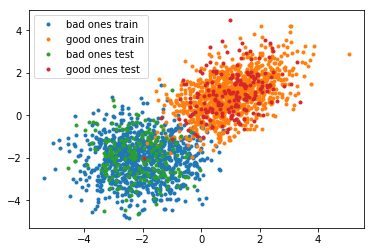

In [16]:
import numpy as np
import matplotlib.pyplot as plt

for quantity, suffix in [(1000, "train"), (200, "test")]:
    samples = np.random.multivariate_normal([-2, -2], [[1, 0], [0, 1]], quantity)
    plt.plot(samples[:, 0], samples[:, 1], '.', label="bad ones " + suffix)
    bad_ones = np.column_stack((np.zeros(quantity), samples))
    
    samples = np.random.multivariate_normal([1, 1], [[1, 0.5], [0.5, 1]], quantity)
    plt.plot(samples[:, 0], samples[:, 1], '.', label="good ones " + suffix)
    good_ones = np.column_stack((np.ones(quantity), samples))
    
    sample = np.row_stack((bad_ones, good_ones))
    np.savetxt("data/the_good_and_the_bad_ones_" + suffix + ".txt", sample, fmt="%1d %4.2f %4.2f")
    
plt.legend()
plt.show()


Bias vector:  [-0.78089082  0.78089082]
Weight matrix:
 [[-0.80193734  0.8019374 ]
 [-0.831303    0.831303  ]]

Applying model to first data set:
[[-1.05999994 -1.55999994]]

Wx + b:  [[ 1.36599553 -1.36599553]]
softmax(Wx + b):  [[ 0.93888813  0.06111182]]
Accuracy on test data:  0.97
Accuracy on training data:  0.9725
[1 1 1 1 0]


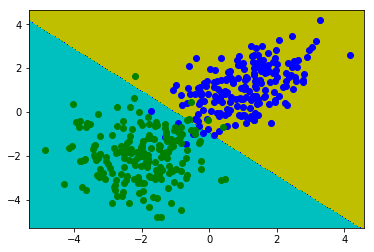

In [15]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL']='2'

import numpy as np
import tensorflow as tf
from matplotlib import pyplot as plt

number_of_samples_per_training_step = 100
num_of_epochs = 1  

num_labels = 2 # should be automatically determined

def evaluation_func(X):
    return predicted_class.eval(feed_dict={x:X}) 

def plot_boundary(X, Y, pred_func):
    # determine canvas borders
    mins = np.amin(X, 0)    # array with column minimums
    mins = mins - 0.1*np.abs(mins)
    maxs = np.amax(X, 0)    # array with column maximums
    maxs = maxs + 0.1*maxs

    xs, ys = np.meshgrid(np.linspace(mins[0], maxs[0], 300), 
                         np.linspace(mins[1], maxs[1], 300))

    # evaluate model using the dense grid
    # c_ creates one array with "points" from meshgrid:

    
    Z = pred_func(np.c_[xs.flatten(), ys.flatten()])
    # Z is one-dimensional and will be reshaped into 300 x 300:  
    Z = Z.reshape(xs.shape) 
    
    # Plot the contour and training examples
    plt.contourf(xs, ys, Z, colors=('c', 'g', 'y', 'b'))
    Xn = X[Y[:,1]==1]
    plt.plot(Xn[:, 0], Xn[:, 1], "bo")
    Xn = X[Y[:,1]==0]
    plt.plot(Xn[:, 0], Xn[:, 1], "go")
    plt.show()


def get_data(fname):
    data = np.loadtxt(fname)
    labels = data[:, :1] #  array([[ 0.], [ 0.], [ 1.], ...]])
    labels_one_hot = (np.arange(num_labels) == labels).astype(np.float32)
    data = data[:, 1:].astype(np.float32)
    return data, labels_one_hot

data_train = "data/the_good_and_the_bad_ones_train.txt"
data_test = "data/the_good_and_the_bad_ones_test.txt"
train_data, train_labels = get_data(data_train)
test_data, test_labels = get_data(data_test)


train_size, num_features = train_data.shape

x = tf.placeholder("float", shape=[None, num_features])
y_ = tf.placeholder("float", shape=[None, num_labels])
   
Weights = tf.Variable(tf.zeros([num_features, num_labels]))
b = tf.Variable(tf.zeros([num_labels]))
y = tf.nn.softmax(tf.matmul(x, Weights) + b)

# Optimization.
cross_entropy = -tf.reduce_sum(y_*tf.log(y))
train_step = tf.train.GradientDescentOptimizer(0.01).minimize(cross_entropy)

# For the test data, hold the entire dataset in one constant node.
test_data_node = tf.constant(test_data)

# Evaluation.
predicted_class = tf.argmax(y, 1)
correct_prediction = tf.equal(tf.argmax(y,1), tf.argmax(y_,1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))

with tf.Session() as sess:

    # Run all the initializers to prepare the trainable parameters.
    init = tf.global_variables_initializer()
    
    sess.run(init)
        
    # Iterate and train.
    for step in range(num_of_epochs * train_size // number_of_samples_per_training_step):
    
        offset = (step * number_of_samples_per_training_step) % train_size

        # get a batch of data
        batch_data = train_data[offset:(offset + 
                                        number_of_samples_per_training_step), :]
        batch_labels = train_labels[offset:(offset + number_of_samples_per_training_step)]
        
        # feed data into the model
        train_step.run(feed_dict={x: batch_data, y_: batch_labels})

    print('\nBias vector: ', sess.run(b))
    print('Weight matrix:\n', sess.run(Weights))

    print("\nApplying model to first data set:")
    first = test_data[:1]
    print(first)
    print("\nWx + b: ", sess.run(tf.matmul(first, Weights) + b))
    # the softmax function, or normalized exponential function, is a generalization of the 
    # logistic function that "squashes" a K-dimensional vector z of arbitrary real values 
    # to a K-dimensional vector σ(z) of real values in the range [0, 1] that add up to 1. 
    print("softmax(Wx + b): ", sess.run(tf.nn.softmax(tf.matmul(first, Weights) + b)))

    print("Accuracy on test data: ", accuracy.eval(feed_dict={x: test_data, y_: test_labels}))
    print("Accuracy on training data: ", accuracy.eval(feed_dict={x: train_data, y_: train_labels}))
    
    # classify some values:
    print(evaluation_func([[-3, 7.3], [-1,8], [0, 0], [1, 0.0], [-1, 0]]))    
        
    plot_boundary(test_data, test_labels, evaluation_func)
    

